# Discrete Distributions
Examples of working with discrete distribution functions.

    author:   Thomas Haslwanter
    date:     Sept-2021

In [29]:
# load the required packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Binomial Distribution

### Example
At the time of writing, one million people have been vaccinated against Covid in Austria, where the total poplulation is about 9 million. When we have a classroom with 19 students:

* How big is the chance that none o those students has been vaccinated?
* What is the chance that exactly one student has been vaccinated?
* What the chance for two, etc....?

In [30]:
# First, generate the "frozen distribution function" ...
p = 1e6/9e6
n = 19
bd = stats.binom(n, p)

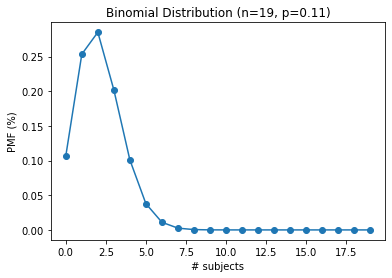

In [31]:
# ... then plot the corresponding "Probability Mass Function (PMF)"
subj = np.arange(start=0, stop=20)     # np.arange generates a vector
pmf = bd.pmf(subj)
plt.plot(subj, pmf, 'o-')

# Format and show the plot
plt.xlabel('# subjects')
plt.ylabel('PMF (%)')

# f' indicates "formatted strings", and allows to insert formatted values
plt.title(f'Binomial Distribution (n={n}, p={p:4.2f})');

### Exercises

1) Try this out for large n-numbers, and see how the distribution changes: **Change to n=100, and restrict the xlim to the interval 0-25**
2) 54.1% of the austrian adult population are overweight (- although at the age of 18, only 18% of the boys and 12% of the girls are overweight.) **What is the chance that exactly 10 out of the 19 Austrians are overweight?**

### Solutions

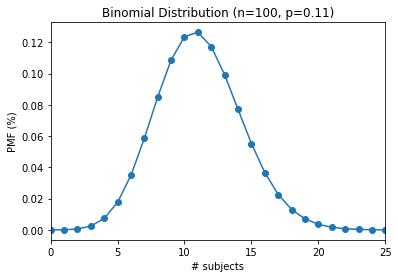

In [32]:
# Solution to Exercise 1
n = 100
subj = np.arange(start=0, stop=n) 
bd = stats.binom(n, p)
pmf = bd.pmf(subj)
plt.plot(subj, pmf, 'o-')

# Format and show the plot
plt.xlabel('# subjects')
plt.ylabel('PMF (%)')
plt.xlim(0, 25)

# f' indicates "formatted strings", and allows to insert formatted values
plt.title(f'Binomial Distribution (n={n}, p={p:4.2f})');

In [33]:
# Solution to Exercise 2
total = 19
p = 54.1/100    # Attention: "%" means divide by 100!!!
n = 10
bd = stats.binom(total, p)
p = bd.pmf(n)
print(f'The probability that exactly {n} of {total} Austrians are overweight is {p*100:4.1f}%')

The probability that exactly 10 of 19 Austrians are overweight is 17.9%


## Poisson Distribution
### Example

At the time of writing we have on average 3 new Covid patients in
Linz ever day. How likely is it that tomorrow we have 0, 1, 2,
... patients?

In [34]:
# Again, first generate the "frozen distribution" ...
m = 3
pd = stats.poisson(m)

Text(0.5, 1.0, 'Poisson Distribution (m=3)')

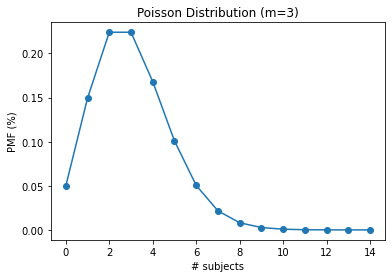

In [35]:
# ... and then plot it
n = np.arange(15)
pmf = pd.pmf(n)
plt.plot(n, pmf, 'o-')

# Format and show the plot
plt.xlabel('# subjects')
plt.ylabel('PMF (%)')
plt.title(f'Poisson Distribution (m={m})')

### Exercise: Display of values
In order to interpret the data, let us print the values for
the probability to have [0, 1, 2, 3, 4] patients tomorrow.

### Solution
Here I split a long string over 2 lines


In [36]:
print('The probability to have [0, 1, 2, 3, 4] patients is ' +
     f'{np.round(pmf[:5]*100)}%')

# And the probability to have 3 or fewer patients is given by the
# "Cumulative Distribution Function (CDF)"
max_val = 3
cdf = 100 * pd.cdf(max_val)      # The "100" is for the "%"-display

print(f'The probability to have {max_val} or fewer patients is ' +
        f'{cdf:4.1f}%')

The probability to have [0, 1, 2, 3, 4] patients is [ 5. 15. 22. 22. 17.]%
The probability to have 3 or fewer patients is 64.7%


## Interactive Curves

In [37]:
from ipywidgets import interactive

### Interactive Binomial Distribution
First, we define a function that plots a distribution

In [38]:
def binom(n, p):
    """This is a function definition. Everything from here on that is indented
    if part of the function. And the 'tripple quotes' indicate a multi-line
    comment 
    """
    plt.figure(2)
    x = np.arange(0, n)

    bd = stats.binom(n, p)
    plt.plot(x, bd.pmf(x), 'o-')
    plt.show()

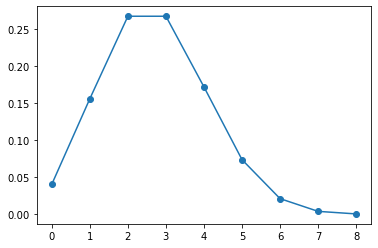

In [39]:
# Using that function, with a fixed argument
binom(9, 0.3)

Up to here you should understand what is happening.

Next, we generate an interactive use of that function. Don't worry about the details here. You can find out more about them under https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html . Just take this as a "boilerplate" to make interactive plots

In [40]:
interactive_plot = interactive(binom, n=(1, 31, 1), p=(0.0, 1, 0.01 ))
output = interactive_plot.children[-1]
output.layout.height = '250px'
interactive_plot

interactive(children=(IntSlider(value=16, description='n', max=31, min=1), FloatSlider(value=0.5, description=…

## Exercise
**Can you generate below an interactive plot for the Poisson Distribution?**

### Solution

In [41]:
def poisson(m):
    """Plot a Poisson Distribution
    
    m : expected value
    """
    plt.figure(2)
    x = np.arange(0, 40)

    pd = stats.poisson(m)
    plt.plot(x, pd.pmf(x), 'o-')
    plt.show()

In [42]:
interactive_plot = interactive(poisson, m=(1, 30, 1))
output = interactive_plot.children[-1]
output.layout.height = '250px'
interactive_plot

interactive(children=(IntSlider(value=15, description='m', max=30, min=1), Output(layout=Layout(height='250px'…